In [1]:
import os,shutil
base_dir = 'C:\\Users\\krishan\\GPU-projects\\DogsVsCats'

In [2]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [3]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [4]:
#compile model
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.rmsprop(lr=1e-4), 
              loss='binary_crossentropy',
             metrics = ['acc'])

In [5]:
#import image data as tensor
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

type(train_datagen)

keras_preprocessing.image.ImageDataGenerator

In [6]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                   class_mode='binary')
validation_generator = test_datagen.flow_from_directory(val_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                   class_mode='binary')
type(train_generator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


keras_preprocessing.image.DirectoryIterator

In [7]:
#for data_batch,label_batch in train_generator:
#    print(data_batch.shape)
#    print(label_batch.shape)
#    break

In [7]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                             epochs=30,
                              validation_data = validation_generator,
                             validation_steps =50)

Epoch 1/30
100/100 [==============================] - 15s 152ms/step - loss: 0.6878 - acc: 0.5335 - val_loss: 0.6703 - val_acc: 0.6140
Epoch 2/30
100/100 [==============================] - 7s 70ms/step - loss: 0.6476 - acc: 0.6285 - val_loss: 0.6631 - val_acc: 0.5910
Epoch 3/30
100/100 [==============================] - 7s 71ms/step - loss: 0.5988 - acc: 0.6800 - val_loss: 0.6643 - val_acc: 0.6180
Epoch 4/30
100/100 [==============================] - 7s 70ms/step - loss: 0.5634 - acc: 0.7195 - val_loss: 0.6086 - val_acc: 0.6520
Epoch 5/30
100/100 [==============================] - 7s 70ms/step - loss: 0.5240 - acc: 0.7275 - val_loss: 0.5840 - val_acc: 0.6780
Epoch 6/30
100/100 [==============================] - 7s 71ms/step - loss: 0.4971 - acc: 0.7480 - val_loss: 0.5553 - val_acc: 0.7140
Epoch 7/30
100/100 [==============================] - 7s 71ms/step - loss: 0.4597 - acc: 0.7870 - val_loss: 0.5700 - val_acc: 0.6990
Epoch 8/30
100/100 [==============================] - 7s 70ms/step 

In [11]:
model.save('basic.h5')
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

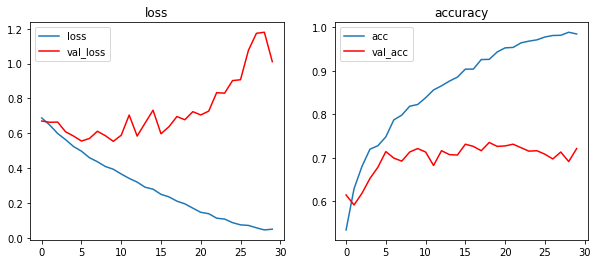

In [18]:
import matplotlib.pyplot as pp
def plothistory(history):
    pp.figure(figsize=(10,4))
    pp.subplot(1,2,1)
    pp.plot(history['loss'])
    pp.plot(history['val_loss'],'r')
    pp.legend(['loss','val_loss'])
    pp.title('loss')
    pp.subplot(1,2,2)
    pp.plot(history['acc'])
    pp.plot(history['val_acc'],'r')
    pp.legend(['acc','val_acc'])
    pp.title('accuracy')
    pp.show()
plothistory(history.history)